In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Successful')

Libraries Import Successful


In [2]:
df= pd.read_csv("TelcoCustomerChurnDataFolkz.csv")

df.head()

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Rows     : ",df.shape[0])
print("Columns  : ",df.shape[1])

def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output;

Rows     :  7043
Columns  :  21


In [4]:
df_summary(df)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [5]:
# NEED TO STUDY
# df_summary(Tdata)
# Tdata.V18= pd.to_numeric(Tdata.V18, errors='coerce')
# Tdata.V18.describe()

In [6]:
# missing value immputation 
df['V18']=df['V18'].fillna(df['V18'].mean())
df['V18'].isnull().sum()

0

In [7]:
df.drop('customerID',axis=1,inplace=True)
df.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [8]:
Num_col = df.select_dtypes(include=['float64','int64']).columns.tolist()
cat_col= df.select_dtypes(include=['object']).columns.tolist()
print(Num_col)
print(cat_col)

['V1', 'V4', 'V17', 'V18']
['gender', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'Churn']


In [9]:
df[Num_col].describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
Binary_class = df[cat_col].nunique()[df[cat_col].nunique() == 2].keys().tolist()
Multi_class =  df[cat_col].nunique()[df[cat_col].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)
#Label encoding Binary Columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    df[i]=le.fit_transform(df[i])

['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


In [11]:
Tdata_Dummy=pd.get_dummies(df[Multi_class])
Tdata_Dummy.head()

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [12]:
final_df = pd.concat([df[Num_col],df[Binary_class],Tdata_Dummy], axis=1)
final_df.shape

(7043, 41)

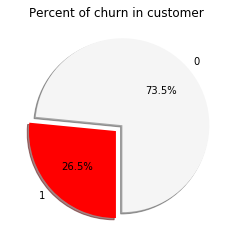

In [13]:
# Data to plot
labels =final_df['Churn'].value_counts(sort = True).index
sizes = final_df['Churn'].value_counts(sort = True)

colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['Churn'],axis=1)
y = final_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [15]:
print('The number of samples into the Train data is {}.'.format(X_train.shape[0]))
print('The number of samples into the test data is {}.'.format(X_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the test data is 1409.


In [16]:

from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy*100)

Logistic Regression accuracy is : 81.19233498935415


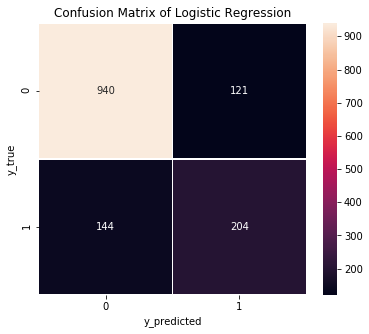

In [18]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,logistic_model.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [19]:
# View the model coefficients
list(zip(X_train.columns, logistic_model.coef_[0]))

[('V1', 0.21878668733983012),
 ('V4', -0.06676502063684288),
 ('V17', -0.0016069857820576409),
 ('V18', 0.00040171040859829637),
 ('gender', -0.011668937156583568),
 ('V2', 0.056579490391883966),
 ('V3', -0.09861549959996968),
 ('V5', -0.24375938407412268),
 ('V15', 0.36366784201413216),
 ('V6_No', -0.21657087238496187),
 ('V6_No phone service', 0.07332283712011653),
 ('V6_Yes', -0.02718851176394201),
 ('V7_DSL', -0.3732286205030814),
 ('V7_Fiber optic', 0.33989260314501724),
 ('V7_No', -0.13710052957289678),
 ('V8_No', 0.2059456130606364),
 ('V8_No internet service', -0.13710052957289678),
 ('V8_Yes', -0.23928163043187023),
 ('V9_No', 0.0946075327387913),
 ('V9_No internet service', -0.13710052957289678),
 ('V9_Yes', -0.12794355011189681),
 ('V10_No', 0.054834558933603304),
 ('V10_No internet service', -0.13710052957289678),
 ('V10_Yes', -0.08817057630953178),
 ('V11_No', 0.20399550713309553),
 ('V11_No internet service', -0.13710052957289678),
 ('V11_Yes', -0.23733152449055828),
 ('V

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train & test roc curve
    '''

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0])

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train & test roc curve
    '''

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)
    
    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

Train AUC =  0.8446951368737824
Test AUC =  0.8583517501381261


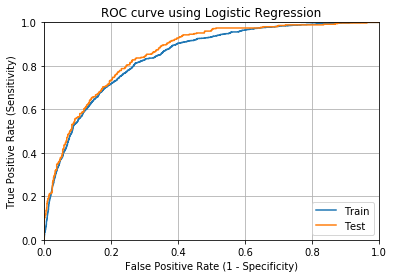

In [22]:
    def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):
        '''
        Generates roc plot
        '''

        fig = plt.plot(fpr, tpr, label='Train')
        fig = plt.plot(fpr_tst, tpr_tst, label='Test')

        if len(args) == 0:
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.title("ROC curve using Logistic Regression")
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()

        else:
            fig = plt.plot(args[0], args[1], label='Validation')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()


            plt.subplots(figsize=(10, 5))
    train_prob = logistic_model.predict_proba(X_train)[:, 1]
    test_prob = logistic_model.predict_proba(X_test)[:, 1]

    plot_roc_curve(y_train, train_prob,
                   y_test, test_prob)

In [23]:
#Training and testing is almost overlapping, then it shows that model is fine,RIGHT?- Yes

In [24]:
## Changing the threshold for the Model
#### By defualt, Logistis regression predicts the probability at 0.5 Threshold, We will be creating a function to check the metrics at each threshold Level.

In [25]:
from sklearn.metrics import accuracy_score
pred_proba_df = pd.DataFrame(logistic_model.predict_proba(X_test)[:,1])

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8]
for i in threshold_list:
    print ('For Threshold = {} '.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)    
    test_accuracy = accuracy_score(y_test,Y_test_pred)
    print('Accuracy {}'.format(test_accuracy))
    print()

For Threshold = 0.05 
Accuracy 0.49254790631653655

For Threshold = 0.1 
Accuracy 0.6117814052519518

For Threshold = 0.15 
Accuracy 0.674237047551455

For Threshold = 0.2 
Accuracy 0.7068843151171044

For Threshold = 0.25 
Accuracy 0.7423704755145494

For Threshold = 0.3 
Accuracy 0.765791341376863

For Threshold = 0.35 
Accuracy 0.7792760823278921

For Threshold = 0.4 
Accuracy 0.7856635911994322

For Threshold = 0.45 
Accuracy 0.8026969481902059

For Threshold = 0.5 
Accuracy 0.8119233498935415

For Threshold = 0.55 
Accuracy 0.8190205819730305

For Threshold = 0.6 
Accuracy 0.8147622427253371

For Threshold = 0.65 
Accuracy 0.8105039034776437

For Threshold = 0.7 
Accuracy 0.7885024840312278

For Threshold = 0.75 
Accuracy 0.7792760823278921

For Threshold = 0.8 
Accuracy 0.7622427253371186



In [27]:
# prediction
final_prediction = pd.DataFrame()
final_prediction['Actual'] = final_df['Churn']
#final_prediction['']

In [28]:
#Predictions
final_predictions=pd.DataFrame()
final_predictions['Actual']=final_df["Churn"]
final_predictions['Predictions']=logistic_model.predict(final_df.drop(['Churn'],axis=1))

final_predictions.head()

,Actual,Predictions
0,0,1
1,0,0
2,1,0
3,0,0
4,1,1


In [29]:
from sklearn.metrics import auc

fpr,tpr,thresholds=roc_curve(final_df["Churn"],logistic_model.predict(final_df.drop(['Churn'],axis=1)))
roc_auc=auc(fpr,tpr)

GINI=(2 * roc_auc) - 1
print("GINI : ",(GINI)*100,"%")

GINI :  45.71610987397787 %
